# Exercise 00: Line chart

Подключаемся к базе данных

In [16]:
import pandas as pd
import sqlite3


connection = sqlite3.connect("../data/checking-logs.sqlite" )

Выполняем запрос, который получает дату и время из таблицы `pageviews`, выбирая только пользователей, а не администраторов.

In [17]:
query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
"""


df = pd.io.sql.read_sql(query, connection)

df.head()

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144


С помощью Pandas создаём новый фрейм данных, в котором будут подсчитаны посещения и сгруппированы по датам.

In [18]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
daily_counts = df.groupby('date').size().reset_index(name='views')

daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts = daily_counts.sort_values('date').reset_index(drop=True)

daily_counts.count()


date     33
views    33
dtype: int64

С помощью метода .plot() в Pandas создаём график

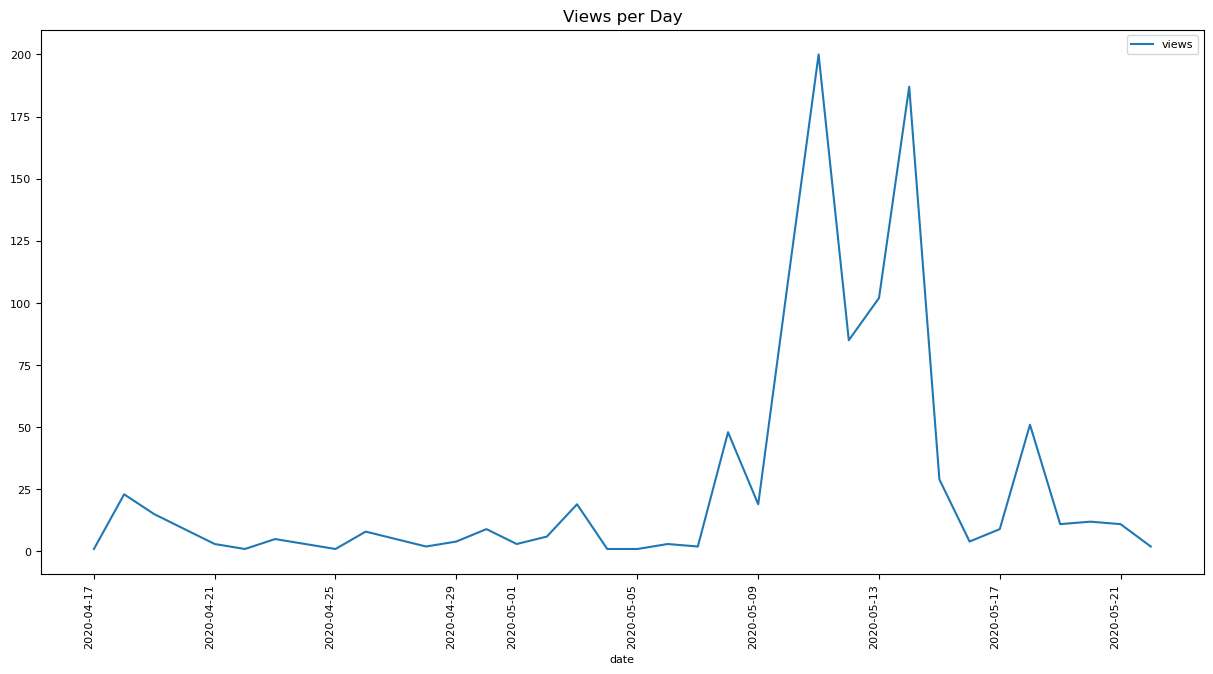

In [19]:
ax = daily_counts.plot(
    x='date',
    y='views',
    figsize=(15, 8),
    title='Views per Day',
    fontsize=8
)

ax.tick_params(axis='x', rotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel("date", fontsize=8)
ax.legend(fontsize=8, loc='upper right')

Закрываем соединение с базой данных

In [20]:
connection.close()